In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')

In [2]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

#### 🔍 히트맵을 통한 변수 간 상관관계 확인 (01_3_LGHV_DataAnalysis_EDA.ipynb 파일에서 진행)
- 독립 변수들 간의 상관관계를 시각적으로 분석하여 **높은 상관관계를 가지는 변수들**을 식별하였음.
- 높은 상관관계를 가진 변수들은 다중 공선성의 가능성이 있으므로, 이를 확인하기 위해 **VIF(분산 팽창 계수)**를 추가로 검증!

#### VIF

In [4]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing2.csv")

In [5]:
# 연속형 변수들 불러오기
num_df = df.select_dtypes(include=['int64','float64'])
num_df

,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,TV_I_CNT,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,KIDS_USE_PV_MONTH1,p_mt
0,733,2.00,0.00,2.00,1.00,1.00,3.00,0.00,0.00,0.00,0.00,202302
1,764,2.00,0.00,2.00,1.00,1.00,3.00,6.72,3.33,3.33,0.00,202303
2,794,2.00,0.00,2.00,1.00,1.00,3.00,9.86,3.71,3.71,0.00,202304
3,825,2.00,0.00,2.00,1.00,1.00,3.00,5.95,3.57,3.57,0.00,202305
4,855,2.00,0.00,2.00,1.00,1.00,3.00,4.03,6.51,6.51,0.00,202306
...,...,...,...,...,...,...,...,...,...,...,...,...
22476020,2338,1.00,0.00,1.00,0.00,0.00,1.00,2.03,0.01,0.01,0.00,202308
22476021,2368,1.00,0.00,1.00,0.00,0.00,1.00,2.91,0.00,0.00,1.00,202309
22476022,2399,1.00,0.00,1.00,0.00,0.00,1.00,1.97,0.19,0.19,0.00,202310
22476023,2429,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,202311


In [6]:
# p_mt(월)는 빼야됨
num_df.drop(columns=['p_mt'], axis=1, inplace=True)

In [8]:
## 다운 -> conda install -c conda-forge statsmodels
# VIF 계산

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# vif 값 저장할 새로운 데이터 프레임 생성
vif_data = pd.DataFrame()
# 새로 생성한 데이터 프레임에 num_df의 컬럼들을 저장
vif_data['Feature'] = num_df.columns

# 각 변수에 대한 VIF 계산
vif_data['VIF'] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]

In [9]:
print(vif_data)

                 Feature     VIF
0        TOTAL_USED_DAYS    2.37
1                TV_SCRB     inf
2            ANALOG_SCRB     inf
3           DIGITAL_SCRB     inf
4    TOTAL_INTERNET_SCRB     inf
5     GIGA_INTERNET_SCRB    1.19
6               TV_I_CNT     inf
7       CH_HH_AVG_MONTH1    1.96
8     CH_25_RATIO_MONTH1 9060.23
9   CH_25_RATIO_MEAN_3MM 9060.32
10    KIDS_USE_PV_MONTH1    1.01


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


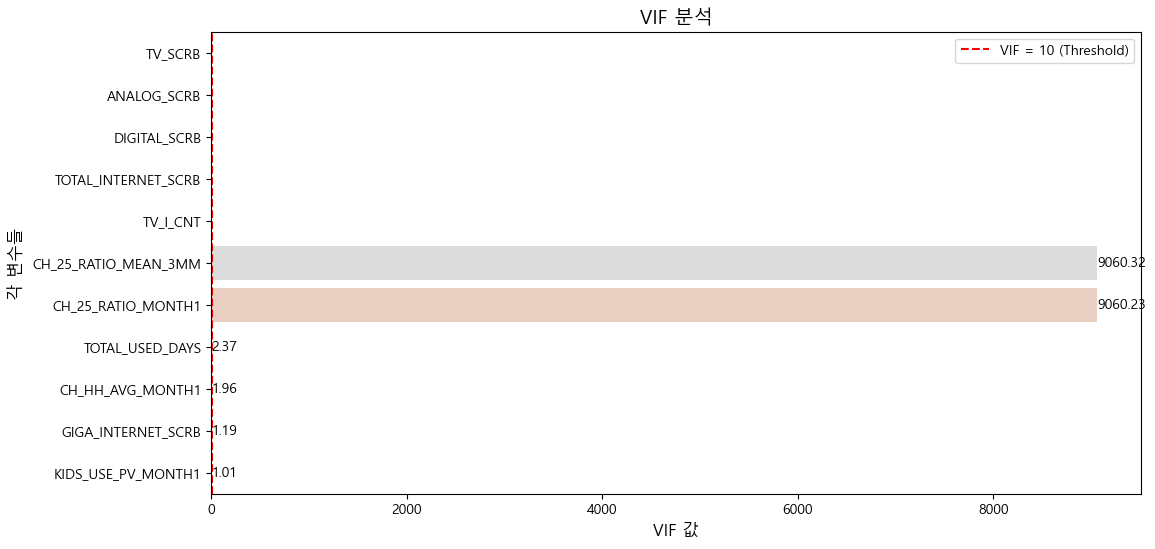

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# VIF 값 정렬 (내림차순)
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data_sorted, palette="coolwarm")

# 제목, 레이블 설정
plt.title("VIF 분석", fontsize=14)
plt.xlabel("VIF 값", fontsize=12)
plt.ylabel("각 변수들", fontsize=12)

# VIF 수치 표시
for index, value in enumerate(vif_data_sorted["VIF"]):
    plt.text(value + 0.2, index, f"{value:.2f}", color='black', ha="left", va="center")

# 보조선
plt.axvline(x=10, color='r', linestyle='--', label="VIF = 10 (Threshold)")
plt.legend()

# 그래프 출력
plt.show()

INF 값은 나오지 않나보다.<br><br>
인터넷에 찾아보니, matplotlib과 seaborn은 INF 값을 정상적으로 플로팅하지 못한다고 함.

#### 📌 VIF(Variance Inflation Factor) 분석 결과

| Feature | VIF |
|---------|-------------|
| TOTAL_USED_DAYS | 2.37 |
| TV_SCRB | ∞ (inf) |
| ANALOG_SCRB | ∞ (inf) |
| DIGITAL_SCRB | ∞ (inf) |
| TOTAL_INTERNET_SCRB | ∞ (inf) |
| GIGA_INTERNET_SCRB | 1.19 |
| TV_I_CNT | ∞ (inf) |
| CH_HH_AVG_MONTH1 | 1.96 |
| CH_25_RATIO_MONTH1 | 9060.23 |
| CH_25_RATIO_MEAN_3MM | 9060.32 |
| KIDS_USE_PV_MONTH1 | 1.01 |


#### 🤔 왜 inf 값이?
특정 변수가 완전히 **다른 변수와 100% 상관관계를 갖거나, 다중 공산성이 너무 심해서 계산이 불가능한 경우** inf(무한대)값이 뜨게 된다.

### 🔍 VIF 분석 요약
#### 1. ∞ inf (무한대)인 변수 제거 또는 조정
- **TV_SCRB, ANALOG_SCRB, DIGITAL_SCRB, TOTAL_INTERNET_SCRB, TV_I_CNT** 중 데이터 EDA를 통해 제거
#### 2. VIF가 9,000 이상인 변수 해결
- **CH_25_RATIO_MONTH1, CH_25_RATIO_MEAN_3MM** 중 하나 제거